# Processing and Model
- Selecting Features and Target
- Splitting the Data into Training and Validation Sets
- Creating and Training the Linear Regression Model
- Predicting on the Validation Set
- Model Evaluation

In [13]:
# Reimporting necessary libraries and loading the datasets again
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets again
train_data = pd.read_csv('../data/curated/train_data.csv')
test_data = pd.read_csv('../data/curated/test_data.csv')

# Select relevant features (Year, Bed, Apartment, postcode) and target (Median rent) for the training dataset
X = train_data[['Year','Bed', 'park_count','Apartment', 'postcode', 'population', 'income', 'Camp', 
                   'Language', 'Primary', 'Secondary', 'Special', 'school_total', 
                   'tram_count', 'bus_count', 'train_count']]
y = train_data['Median']

# Split the data into training and validation sets (80% for validation, 20% for training)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.8, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = model.predict(X_val)

# Calculate R^2 score and RMSE on the validation set
r2 = r2_score(y_val, y_val_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

r2, rmse

(0.6991467687975705, 97.08393271614699)

The R-squared value for this linear regression model is 0.6991, which means that the model explains 69.91% of the variance in the data. This means that the model performs reasonably well in explaining the variation in the target variable, but there is still about 30% of the variation that is not captured by the model.

At the same time, the RMSE (root mean square error) of the model is 97.08, which means that the average error between the predicted and actual values is about 97 units. This error value indicates that there is room for improvement in the model's predictions, especially when it comes to making them more accurate.

In general, our model provides a good fit, but we can improve the accuracy by optimizing our model or choosing a more complex model. One might consider introducing more relevant features, using regularization methods, or testing nonlinear models to improve the predictive power.

# Residual Analysis

The plot shows the frequency distribution of the residuals (actual values minus predicted values) predicted by the model. The residuals are mainly concentrated around 0, showing the form of normal distribution, indicating that the model prediction is relatively accurate in most cases, but there are still some large positive and negative residuals, indicating large differences between some predicted values and the actual values.

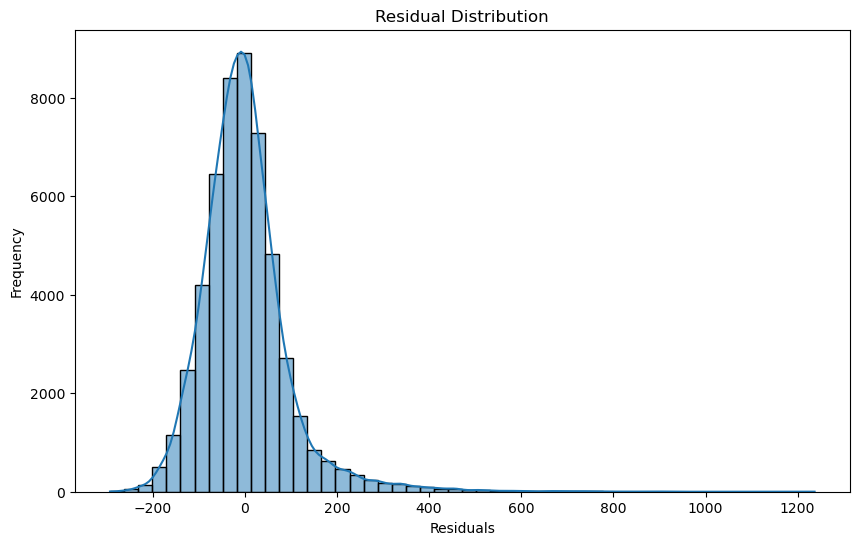

In [14]:
# Calculate residuals
residuals = y_val - y_val_pred

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=50, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')


plt.savefig("../plots/Residual Distribution LR.png")

# Learning Curves

The figure shows the trend of training error and validation error as the number of training samples increases. With the increase of training samples, the errors of both gradually decrease and tend to be stable. This shows that the performance of the model improves as the amount of data increases and tends to converge for larger datasets, where the training error is lower than the validation error, indicating that the model fits the training set well.

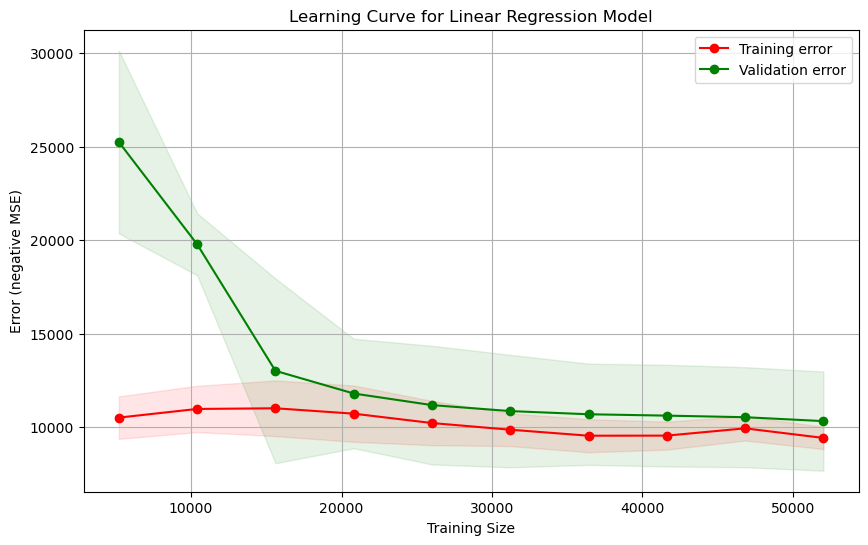

In [15]:
# Reimporting necessary libraries and loading the datasets again
import pandas as pd
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np

# Load the datasets again
train_data = pd.read_csv('../data/curated/train_data.csv')

# Select relevant features (Year, Bed, Apartment, postcode) and target (Median rent) for the training dataset
X = train_data[['Year','Bed', 'park_count','Apartment', 'postcode', 'population', 'income', 'Camp', 
                   'Language', 'Primary', 'Secondary', 'Special', 'school_total', 
                   'tram_count', 'bus_count', 'train_count']]
y = train_data['Median']

# Initialize the linear regression model
model = LinearRegression()

# Define a function to plot the learning curve
def plot_learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error'):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )
    
    # Calculate the mean and standard deviation for training and validation scores
    train_mean = -np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = -np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, val_mean, 'o-', color="g", label="Validation error")
    
    # Add labels and title
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="r", alpha=0.1)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="g", alpha=0.1)
    plt.xlabel("Training Size")
    plt.ylabel("Error (negative MSE)")
    plt.title("Learning Curve for Linear Regression Model")
    plt.legend(loc="best")
    plt.grid(True)


# Plot the learning curve for the linear regression model
plot_learning_curve(model, X, y)

plt.savefig("../plots/Learning Curve for Linear Regression Model.png")

The figure shows the important features that affect the prediction results, with the number of bedrooms (Bed) and Camp contributing the most to the model's prediction, followed by the number of train stations (train_count) and Language. The importance of these features reflects the extent of their influence on rent prediction, indicating that the model relies more on these factors for rent estimation.

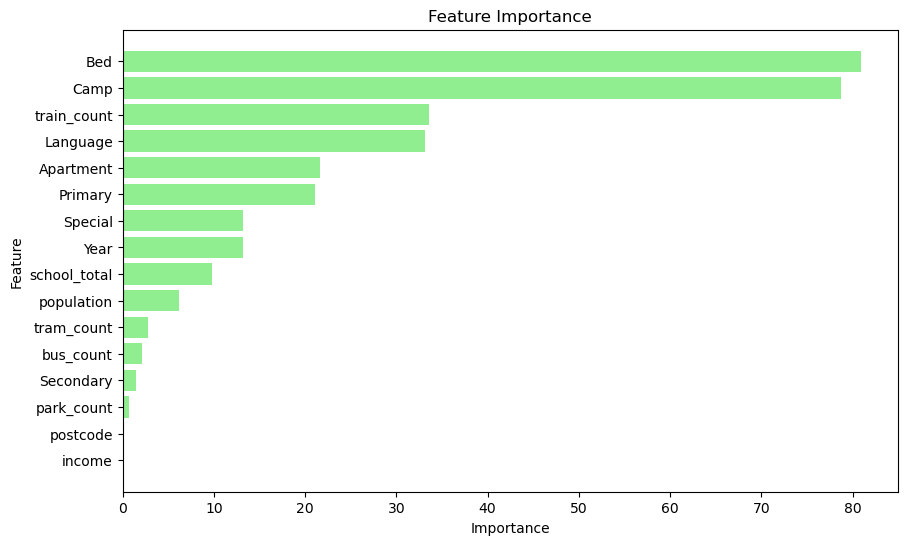

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

# Get the feature importance (coefficients) from the linear regression model
feature_importance = np.abs(model.coef_)

# Create a DataFrame to display feature names and their importance
features = ['Year','Bed', 'park_count','Apartment', 'postcode', 'population', 'income', 'Camp', 
                   'Language', 'Primary', 'Secondary', 'Special', 'school_total', 
                   'tram_count', 'bus_count', 'train_count']
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visual feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightgreen')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()


plt.savefig("../plots/Feature_importance LR.png")

In [17]:
test_data_features = test_data[['Year','Bed', 'park_count','Apartment', 'postcode', 'population', 'income', 'Camp', 
                   'Language', 'Primary', 'Secondary', 'Special', 'school_total', 
                   'tram_count', 'bus_count', 'train_count']]
test_data['predicted_rent'] = model.predict(test_data_features)

# Display the test data with the new 'predicted_rent' column
output_path = '../data/curated/predictions_Lg.csv'
test_data.to_csv(output_path, index=False)
test_data


,postcode,Year,Bed,Apartment,population,income,Camp,Language,Primary,Secondary,Special,school_total,tram_count,bus_count,train_count,park_count,mean_park_area,predicted_rent
0,3206,2024,2,0,0.056343,149459,0.0,0.0,3.0,1.0,0.0,4.0,33.0,0.0,0.0,2.0,109.9035,597.860911
1,3206,2024,3,0,0.056343,149459,0.0,0.0,3.0,1.0,0.0,4.0,33.0,0.0,0.0,2.0,109.9035,678.763967
2,3206,2024,4,0,0.056343,149459,0.0,0.0,3.0,1.0,0.0,4.0,33.0,0.0,0.0,2.0,109.9035,759.667024
3,3206,2024,1,1,0.056343,149459,0.0,0.0,3.0,1.0,0.0,4.0,33.0,0.0,0.0,2.0,109.9035,495.298763
4,3206,2024,2,1,0.056343,149459,0.0,0.0,3.0,1.0,0.0,4.0,33.0,0.0,0.0,2.0,109.9035,576.201820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3375,3357,2027,2,0,0.016016,91513,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,37.4864,526.342656
3376,3357,2027,3,0,0.016016,91513,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,37.4864,607.245712
3377,3357,2027,4,0,0.016016,91513,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,37.4864,688.148769
3378,3357,2027,1,1,0.016016,91513,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0,37.4864,423.780508


The figure presents historical and predicted rent trends for different numbers of bedrooms. As you can see, rents for 1 to 4 bedrooms are on the rise and are projected to continue to rise in the future. Rent growth was larger for more bedrooms, indicating continued demand for larger Spaces.

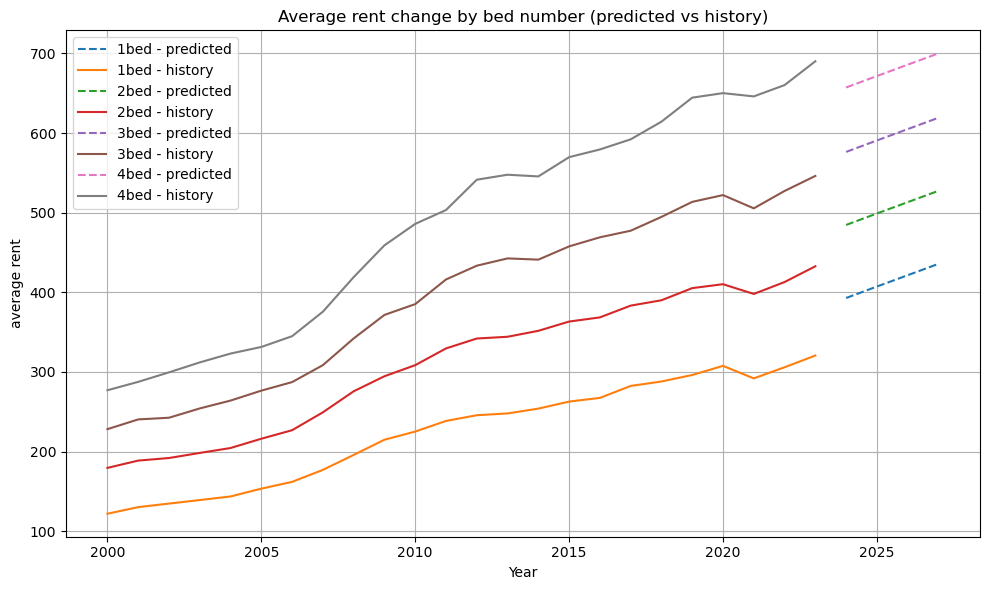

In [18]:
min_year = min(test_data['Year'].min(), train_data['Year'].min())
max_year = max(test_data['Year'].max(), train_data['Year'].max())

# Calculate the average rent per year and bed from both datasets
predicted_avg_rent = test_data.groupby(['Year', 'Bed'])['predicted_rent'].mean().reset_index()
train_avg_rent = train_data.groupby(['Year', 'Bed'])['Median'].mean().reset_index()

# Combine both datasets for consistent year and bed comparisons
combined_avg_rent = pd.merge(predicted_avg_rent, train_avg_rent, on=['Year', 'Bed'], how='outer')

# Plotting the graph with combined data
plt.figure(figsize=(10, 6))

# Loop through the bed types and plot the corresponding lines for each
for bed in [1, 2, 3, 4]:
    bed_data = combined_avg_rent[combined_avg_rent['Bed'] == bed]
    plt.plot(bed_data['Year'], bed_data['predicted_rent'], label=f'{bed}bed - predicted', linestyle='--')
    plt.plot(bed_data['Year'], bed_data['Median'], label=f'{bed}bed - history', linestyle='-')

# Label the axes
plt.xlabel('Year')
plt.ylabel('average rent')
plt.title('Average rent change by bed number (predicted vs history)')

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)

# Show the plot
plt.tight_layout()

plt.savefig("../plots/Average rent change by bed number (predicted vs history) LR.png")